# Run An Odds Ratio

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [35]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/odds_ratios/meaningful_threshoold'

Import Data

In [36]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.xlsx'
sheet = 'master_list_proper_subjects'

In [37]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,19.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,17.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,16.300000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,17.000000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [38]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [39]:
drop_list = ['City', 'StimMatch24', 'IMPROVE_OR_STABLE']

In [40]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,211,58.7,NaN,NaN,NaN,NaN,-0.415745,-0.189000,19.900000,19.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,152,69.4,NaN,NaN,NaN,NaN,-0.701419,-0.455000,17.900000,17.900000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,208,79.2,NaN,NaN,NaN,NaN,-0.929958,-0.669000,16.300000,16.300000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,223,71.1,NaN,NaN,NaN,NaN,-0.829972,-0.575000,17.000000,17.000000,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [41]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

Set the parameters for dropping rows

In [44]:
column = 'City'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'Queensland' # The value to drop if found

In [45]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_T_By_Origin_Group_,Z_Scored_Subiculum_Connectivity_T,Subiculum_Connectivity_T_Redone,Subiculum_Connectivity_T,...,DECLINE,Cognitive_Improve,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,0.314066,-21.428571,-1.282630,-1.282630,21.150595,56.864683,...,1.0,No,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,0.013999,-36.363636,-1.760917,-1.760917,19.702349,52.970984,...,1.0,No,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-0.841572,-78.947368,-0.595369,-0.595369,23.231614,62.459631,...,1.0,No,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-1.855477,-129.411765,-0.945206,-0.945206,22.172312,59.611631,...,1.0,No,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,0.533109,-10.526316,-1.151973,-1.151973,21.546222,57.928350,...,0.0,No,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,39,63.0,0.000000,0.598787,0.111651,0.000000,-0.044369,-0.119000,22.500000,22.500000,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,40,77.0,0.000000,0.598787,0.111651,0.000000,0.969773,1.170000,29.600000,29.600000,...,0.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,73.0,-0.500000,0.513389,-0.362865,-0.250000,0.355574,0.390000,25.300000,25.300000,...,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,49,68.0,0.000000,0.427991,-0.837381,-0.500000,-0.544298,-0.756000,19.000000,19.000000,...,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

In [ ]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Simple Odds Ratio


In [46]:
import pandas as pd
import numpy as np

def calculate_contingency_values(df, condition_column, outcome_column, condition_success, outcome_success):
    """
    Calculates the values of a, b, c, and d for a 2x2 contingency table from a DataFrame.

    Parameters:
    df (pd.DataFrame): The input data frame.
    condition_column (str): The name of the column that contains the condition.
    outcome_column (str): The name of the column that contains the outcome.
    condition_success (any): The value in the condition column that indicates success.
    outcome_success (any): The value in the outcome column that indicates success.

    Returns:
    tuple: A tuple containing the values of a, b, c, and d.
    """
    # Patients who meet the condition
    condition_positive = df[condition_column] == condition_success

    # Patients who don't meet the condition
    condition_negative = ~condition_positive

    # Patients who improved
    outcome_positive = df[outcome_column] == outcome_success

    # Patients who did not improve
    outcome_negative = ~outcome_positive

    # Count values for a, b, c, d
    a = df[condition_positive & outcome_positive].shape[0]
    b = df[condition_positive & outcome_negative].shape[0]
    c = df[condition_negative & outcome_positive].shape[0]
    d = df[condition_negative & outcome_negative].shape[0]

    return a, b, c, d

# Example usage:
# df = pd.DataFrame({'Condition': [...], 'Outcome': [...]})
# a, b, c, d = calculate_contingency_values(df, 'Condition', 'Outcome', 'ConditionSuccessValue', 'OutcomeSuccessValue')
# print(a, b, c, d)

def calculate_odds_ratio(a, b, c, d):
    """
    Calculates the odds ratio from a 2x2 contingency table.
    
    Parameters:
    a (int): Number of patients who meet the condition and improved.
    b (int): Number of patients who meet the condition and did not improve.
    c (int): Number of patients who do not meet the condition but improved.
    d (int): Number of patients who do not meet the condition and did not improve.
    
    Returns:
    float: The odds ratio.
    """
    try:
        odds_ratio = (a * d) / (b * c)
        print("Odds ratio: ", odds_ratio)
        print("Log-odds ratio: ", np.log(odds_ratio))
        return odds_ratio
    except ZeroDivisionError:
        return "Cannot calculate odds ratio due to division by zero."
# Example usage:
# a, b, c, d = 10, 20, 30, 40
# print(calculate_odds_ratio(a, b, c, d)

In [47]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

In [57]:
outcome = 'IMPROVE_OR_STABLE'
successful_outcome = True
treatment = 'StimMatch'
treatment_success = 'Match'

In [58]:
a, b, c, d = calculate_contingency_values(data_df, condition_column=treatment, outcome_column=outcome, condition_success=treatment_success, outcome_success=successful_outcome)
odds_ratio = calculate_odds_ratio(a, b, c, d)

Odds ratio:  3.235294117647059
Log-odds ratio:  1.1741198411762548


# 03 - Forest Plot
- This code allows you to adjust for covariates.
- Instead of a normal ad/cb odds ratio calculation, this uses logistic regression.

In [59]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement',
       'Z_Scored_Subiculum_T_By_Origin_Group_',
       'Z_Scored_Subiculum_Connectivity_T', 'Subiculum_Connectivity_T_Redone',
       'Subiculum_Connectivity_T', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Categorical_Age_Group', 'Age_Group',
       'Age_And_Disease', 'Age_Disease_and_Cohort',

- Treatment is the string matching a 'positive' treatment. 

In [73]:
outcome = 'IMPROVE_OR_STABLE'
predictor = 'StimMatch24'
cohorts = 'City'
covariate_list = None
treatment = 'Match'

Running formula:  IMPROVE_OR_STABLE ~ StimMatch24
Optimization terminated successfully.
         Current function value: 0.632975
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.400332
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564761
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.672973
         Iterations 4


,label,estimate,ll,hl,pvalue
0,Toronto,1.139434,-0.100156,2.379024,0.071608
1,Wurzburg,-1.455287,-3.440752,0.530177,0.150833
2,Boston,-1.386294,-3.852528,1.079940,0.270586
3,Summary,0.036578,-0.801946,0.875101,0.931867


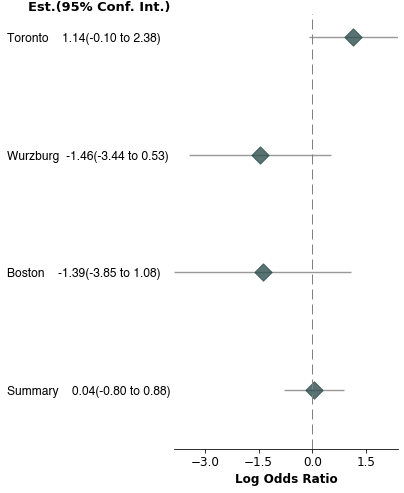

In [74]:
from calvin_utils.statistical_utils.forest_plots import OddsRatioForestPlot
# Create an instance of the LogisticOddsRatioPlot class with covariates
plot = OddsRatioForestPlot(data_df, outcome_col=outcome, predictor_col=predictor,
                             category_col=cohorts, treatment=treatment, covariates=None,
                             table=False, log_odds=True, out_dir=None)

# Run the plotting process
plot.run()
plot.data_for_plot

# 04 - Convert Log-Odds to Probability(Event)

In [1]:
import numpy as np

def log_odds_to_probability(log_odds):
    """
    Convert log odds to probability.
    
    Parameters:
        log_odds (float or np.array): Log odds value(s)
        
    Returns:
        float or np.array: Probability corresponding to the given log odds
    """
    return 1 / (1 + np.exp(-log_odds))


In [14]:
log_odds_to_probability(2.05)

0.8859476187202091